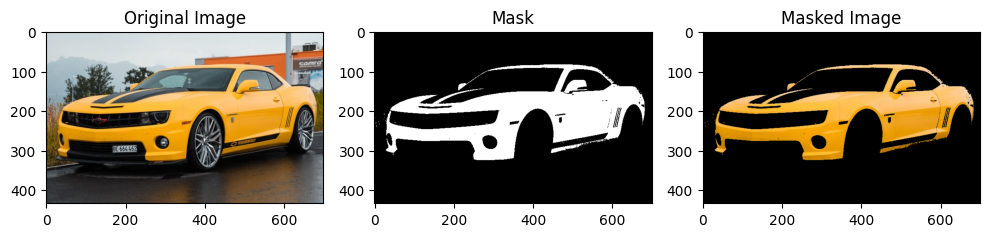

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read input image
img = cv2.imread('car.jpg')

# Convert BGR to HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Define range of yellow color in HSV
lower_yellow = np.array([15, 50, 180])
upper_yellow = np.array([40, 255, 255])

# Create a mask. Threshold the HSV image to get only yellow colors
mask = cv2.inRange(hsv, lower_yellow, upper_yellow)

# Bitwise-AND mask and original image
result = cv2.bitwise_and(img, img, mask=mask)

# Display the mask and masked image using Matplotlib
plt.figure(figsize=(10, 5))

# Display the original image
plt.subplot(131)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

# Display the mask
plt.subplot(132)
plt.imshow(mask, cmap='gray')
plt.title('Mask')

# Display the masked image
plt.subplot(133)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title('Masked Image')

plt.tight_layout()
plt.show()


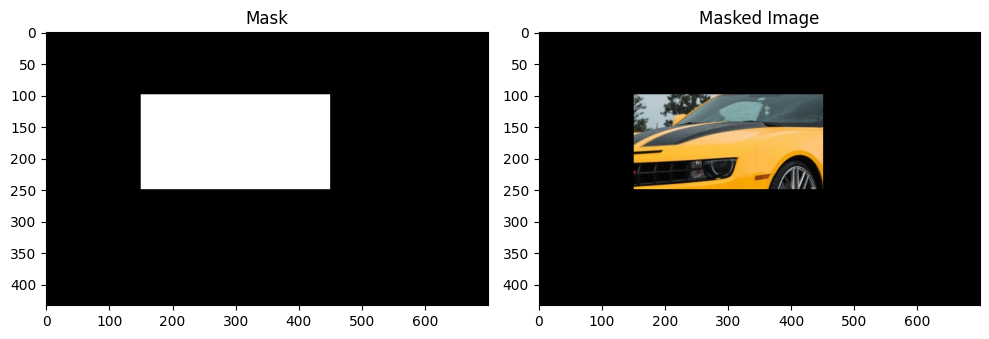

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read an input image as a gray image
img = cv2.imread('car.jpg')

# Create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:250, 150:450] = 255

# Compute the bitwise AND using the mask
masked_img = cv2.bitwise_and(img, img, mask=mask)

# Create a figure with subplots for displaying the mask and masked image
plt.figure(figsize=(10, 5))

# Display the mask
plt.subplot(121)
plt.imshow(mask, cmap='gray')
plt.title('Mask')

# Display the masked image
plt.subplot(122)
plt.imshow(cv2.cvtColor(masked_img, cv2.COLOR_BGR2RGB))
plt.title('Masked Image')

plt.tight_layout()
plt.show()


### Observations

1. **Input Image:** The original image `'car.jpg'` is loaded and used as the base for further processing.

2. **Mask Creation:** A binary mask is created using NumPy. This mask is black (`0`) for most of the image, except for a rectangular region where pixels are set to white (`255`). This defines the region of interest (ROI) that will be preserved in the final masked image.

3. **Bitwise AND Operation:** The `cv2.bitwise_and` function is applied to the input image and the mask. This operation preserves only the pixels in the ROI specified by the mask and sets all other pixels to zero.

4. **Matplotlib Display:** The mask and the resulting masked image are displayed using Matplotlib in a Jupyter Notebook. 

   - The first subplot displays the mask. The mask appears as a grayscale image, where white pixels represent the region of interest.
   
   - The second subplot displays the masked image. This image shows the original image with only the selected ROI remaining, and the rest of the image is blacked out.

These observations provide an overview of the code's functionality for creating a mask and applying it to the input image, resulting in a masked image that highlights a specific region of interest within the original image.


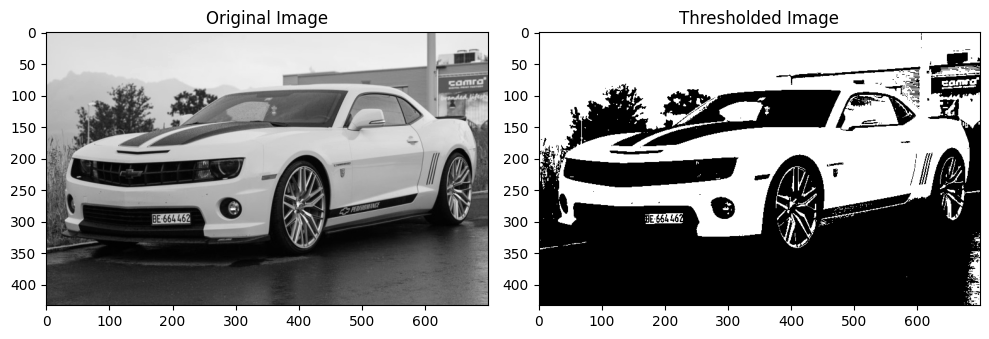

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image in grayscale
img = cv2.imread('car.jpg', cv2.IMREAD_GRAYSCALE)

# Set the threshold value
threshold_value = 128

# Apply thresholding
ret, thresholded_img = cv2.threshold(img, threshold_value, 255, cv2.THRESH_BINARY)

# Display the original and thresholded images using Matplotlib
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

# Thresholded image
plt.subplot(122)
plt.imshow(thresholded_img, cmap='gray')
plt.title('Thresholded Image')

plt.tight_layout()
plt.show()


C:\Users\joelb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


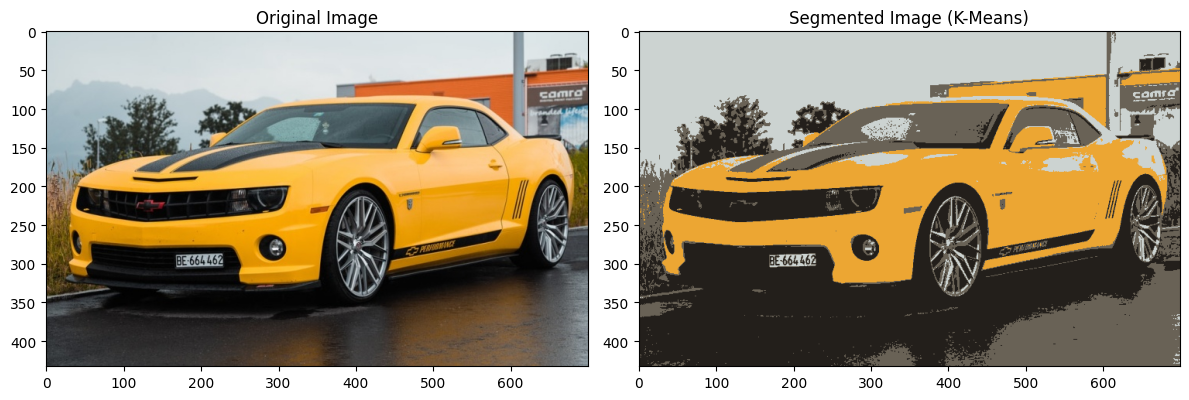

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load an image
img = cv2.imread('car.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB color space

# Reshape the image into a 2D array of pixels
pixels = img.reshape((-1, 3))

# Number of clusters (K)
K = 4

# Create a K-Means model
kmeans = KMeans(n_clusters=K)

# Fit the K-Means model to the pixel data
kmeans.fit(pixels)

# Get cluster labels for each pixel
labels = kmeans.labels_

# Get cluster centers (colors)
cluster_centers = kmeans.cluster_centers_.astype(int)

# Assign each pixel to the cluster center color
segmented_img = cluster_centers[labels].reshape(img.shape)

# Display the original and segmented images using Matplotlib
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(121)
plt.imshow(img)
plt.title('Original Image')

# Segmented image
plt.subplot(122)
plt.imshow(segmented_img)
plt.title('Segmented Image (K-Means)')

plt.tight_layout()
plt.show()


C:\Users\joelb\AppData\Local\Temp\ipykernel_20792\3951005876.py:29: RuntimeWarning: overflow encountered in scalar subtract
  if abs(current_intensity - seed_intensity) < threshold:


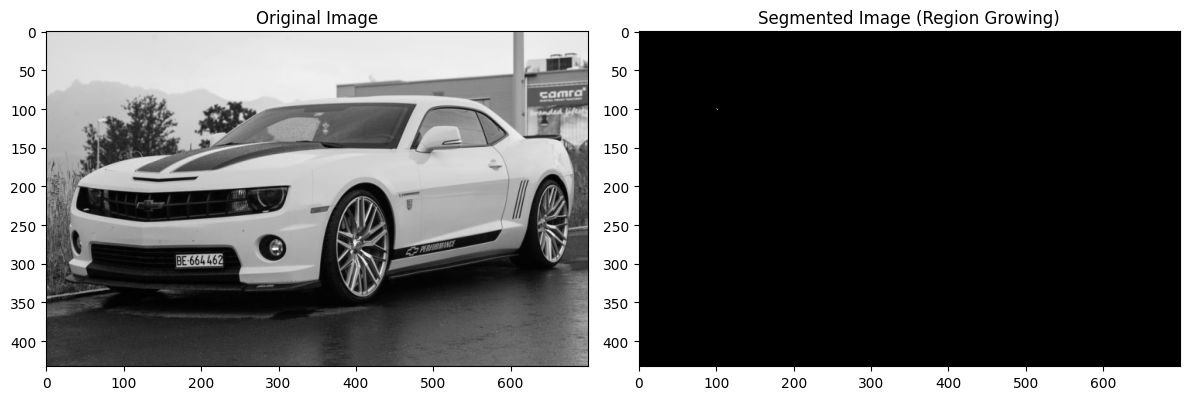

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def region_growing(img, seed, threshold):
    # Create a mask for the segmented region
    h, w = img.shape[:2]
    segmented = np.zeros_like(img, dtype=np.uint8)
    mask = np.zeros((h, w), dtype=np.uint8)

    # Define neighbors (8-connectivity)
    neighbors = [(1, 0), (-1, 0), (0, 1), (0, -1), (1, 1), (-1, -1), (1, -1), (-1, 1)]

    # Initialize a stack for the seed pixel
    stack = [seed]

    # Get the seed pixel's intensity
    seed_intensity = img[seed[0], seed[1]]

    while len(stack) > 0:
        # Pop a pixel from the stack
        current_pixel = stack.pop()

        # Mark the pixel as visited
        mask[current_pixel[0], current_pixel[1]] = 1

        # Check similarity criterion
        current_intensity = img[current_pixel[0], current_pixel[1]]
        if abs(current_intensity - seed_intensity) < threshold:
            segmented[current_pixel[0], current_pixel[1]] = img[current_pixel[0], current_pixel[1]]

            # Add unvisited neighbors to the stack
            for neighbor in neighbors:
                x, y = current_pixel[0] + neighbor[0], current_pixel[1] + neighbor[1]
                if 0 <= x < h and 0 <= y < w and mask[x, y] == 0:
                    stack.append((x, y))

    return segmented

# Load an image in grayscale
img = cv2.imread('car.jpg', cv2.IMREAD_GRAYSCALE)

# Set the seed point (starting point)
seed = (100, 100)

# Set the threshold for similarity
threshold_value = 20

# Apply region growing
segmented_img = region_growing(img, seed, threshold_value)

# Display the original and segmented images using Matplotlib
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

# Segmented image
plt.subplot(122)
plt.imshow(segmented_img, cmap='gray')
plt.title('Segmented Image (Region Growing)')

plt.tight_layout()
plt.show()


### Observations

***Thresholding
Explanation:*** Thresholding is a simple image segmentation technique that divides an image into two regions based on a specified intensity threshold. Pixels with values above the threshold are assigned to one region (typically white), while pixels below the threshold are assigned to another region (typically black).

***Observations:***

Thresholding is easy to understand and implement, making it a quick and straightforward way to segment images.
It works well when there is a clear distinction between the object of interest and the background in terms of intensity or color.
Thresholding may not be suitable for images with complex backgrounds or when the object of interest has varying intensities.
Choosing an appropriate threshold value can be challenging and may require experimentation or automated methods like Otsu's thresholding.
It is commonly used in tasks such as object detection in document images or simple foreground-background separation.
Segmentation using K-Means


***Explanation:*** K-Means clustering is an unsupervised machine learning technique used for image segmentation. It partitions an image into K clusters based on color similarity, where K is the number of clusters specified beforehand. Pixels are assigned to the cluster with the nearest mean color value.

***Observations:***

K-Means clustering is effective for color-based image segmentation and can handle images with complex color distributions.
The choice of the number of clusters (K) can significantly impact the segmentation result, and selecting an appropriate K is often a trial-and-error process.
K-Means can struggle with complex textures and when regions of interest have similar colors.
The method may require preprocessing steps such as color space conversions or noise reduction to improve results.
It has applications in natural scene analysis, image compression, and color-based object recognition.



***Region Growing***
Explanation: Region growing is a region-based image segmentation method that starts from a seed pixel and iteratively adds neighboring pixels to a segmented region based on a similarity criterion. The process continues until no more pixels can be added to the region.

***Observations:***

Region growing is versatile and can be adapted to various similarity criteria, making it suitable for a wide range of segmentation tasks.
The choice of seed pixel and similarity criterion plays a crucial role in the segmentation result, and they need to be selected carefully.
It can be computationally intensive for large images or complex similarity criteria.
Region growing is less affected by noise compared to some other methods, as it considers local pixel neighborhoods.
It is used in medical image analysis (e.g., tumor detection), object tracking, and remote sensing applications for land cover classification.
These observations provide insights into the strengths and limitations of each segmentation method and can help in choosing the most suitable technique for specific image processing tasks.

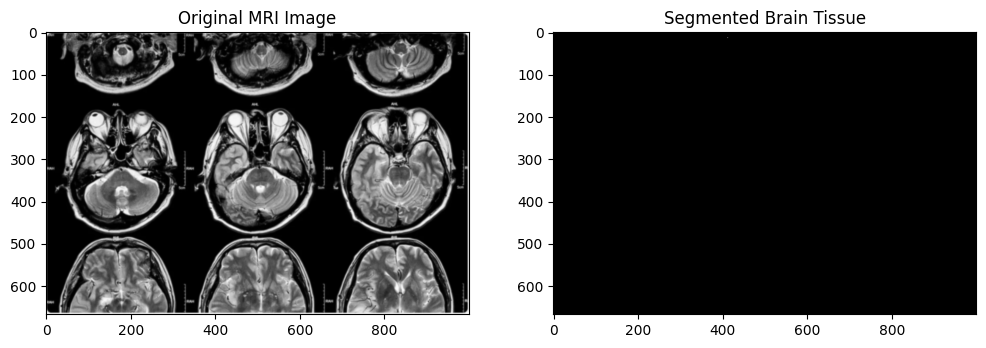

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, exposure, filters, morphology, measure, segmentation
from skimage.segmentation import clear_border

# Load the MRI image (replace 'brain_mri.jpg' with your image file)
image = io.imread('brain.jpeg', as_gray=True)

# Preprocessing
image = exposure.rescale_intensity(image)
image = filters.gaussian(image, sigma=1)

# Thresholding
threshold_value = filters.threshold_otsu(image)
binary_image = image > threshold_value

# Morphological operations
binary_image = morphology.closing(binary_image, morphology.disk(5))
binary_image = clear_border(binary_image)

# Label connected components
label_image = measure.label(binary_image)

# Create a mask for brain tissue (adjust label value as needed)
brain_mask = (label_image == 1)

# Apply the mask to the original image
segmented_image = image.copy()
segmented_image[~brain_mask] = 0

# Display the original and segmented images
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Original MRI Image')
plt.subplot(122)
plt.imshow(segmented_image, cmap='gray')
plt.title('Segmented Brain Tissue')
plt.show()


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour

In [42]:
img = cv2.imread('brain.jpg', cv2.IMREAD_GRAYSCALE)
# img = rgb2gray(img)

In [43]:
s = np.linspace(0, 2*np.pi, 400)
x = 220 + 100*np.cos(s)
y = 100 + 100*np.sin(s)
init = np.array([x, y]).T

In [59]:
cntr = active_contour(gaussian(img, 3),init, alpha=0.0001, beta=10, gamma=0.005)

(0.0, 200.0, 249.0, 0.0)

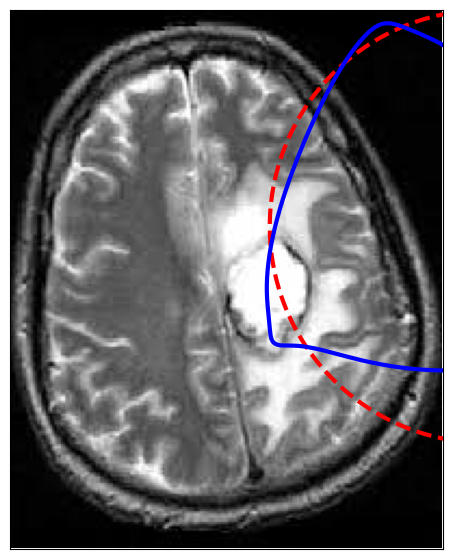

In [60]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img, cmap=plt.cm.gray)
# Circular boundary
ax.plot(init[:, 0], init[:, 1], '--r', lw=3)
# Detected contour
ax.plot(cntr[:, 0], cntr[:, 1], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])